# Auto Detection of Handwritten Numbers 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist_data= fetch_openml("mnist_784")

In [29]:
mnist_data.data.shape

(70000, 784)

In [30]:
def showImage(dframe,index):
    some_digit=dframe.to_numpy()[index]
    some_digit_img=some_digit.reshape(28,28) #28*28
    plt.imshow(some_digit_img, cmap="binary")
    plt.axis("off")
    plt.show()

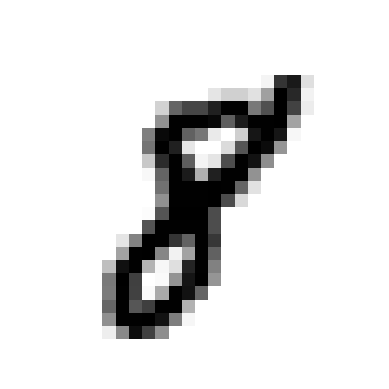

In [31]:
#example for function
showImage(mnist_data.data,17)

## --> Split Data

In [32]:
img_train, img_test, lbl_train, lbl_test = train_test_split(mnist_data.data, mnist_data.target, test_size=1/6.0, random_state=0)

In [33]:
type(img_train)

pandas.core.frame.DataFrame

In [34]:
img_test_copy= img_test.copy()

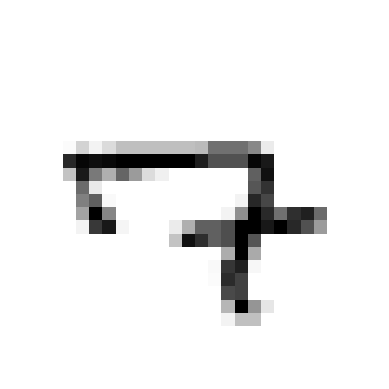

In [35]:
showImage(img_test_copy,4)

## --> Scaling

In [36]:
scaler=StandardScaler()
scaler.fit(img_train)

img_train= scaler.transform(img_train)
img_test=scaler.transform(img_test)

## --> PCA

In [37]:
pca=PCA(.90)

In [38]:
pca.fit(img_train)

PCA(n_components=0.9)

In [39]:
print(pca.n_components_)

233


In [40]:
img_train= pca.transform(img_train)
img_test= pca.transform(img_test)

## --> Logistic Regression

In [41]:
logisticReg= LogisticRegression(solver="lbfgs", max_iter=10_000)

In [42]:
logisticReg.fit(img_train, lbl_train)

LogisticRegression(max_iter=10000)

In [45]:
logisticReg.predict(img_test[0].reshape(1,-1))

array(['0'], dtype=object)

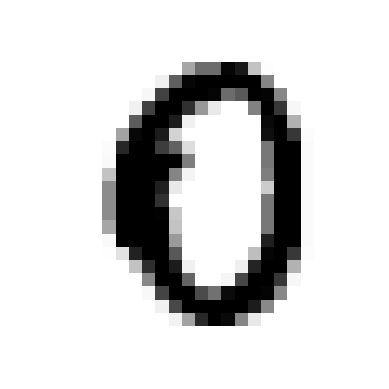

In [46]:
showImage(img_test_copy,0)

In [47]:
logisticReg.predict(img_test[2].reshape(1,-1))

array(['1'], dtype=object)

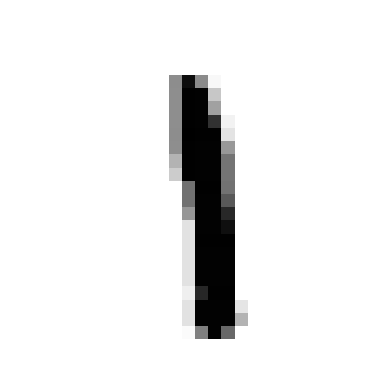

In [48]:
showImage(img_test_copy,2)

## --> Accuracy

In [49]:
logisticReg.score(img_test,lbl_test)

0.9181451958515471